In [ ]:
#해당 셀 실행후 런타임 재시작 
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (8,183 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122542 files and di

In [ ]:
!wget "https://github.com/ausungju/human_learning/raw/main/trash_new.npy" -O trash.npy
!wget "https://github.com/ausungju/human_learning/raw/main/target_new.npy" -O target.npy

--2023-06-05 10:53:19--  https://github.com/ausungju/human_learning/raw/main/trash_new.npy
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/ausungju/human_learning/main/trash_new.npy [following]
--2023-06-05 10:53:19--  https://media.githubusercontent.com/media/ausungju/human_learning/main/trash_new.npy
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 139200128 (133M) [application/octet-stream]
Saving to: ‘trash.npy’

trash.npy           100%[===================>] 132.75M   226MB/s    in 0.6s    

2023-06-05 10:53:22 (226 MB/s) - ‘trash.npy’ saved [139200128/139200128]

--2023-06-0

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

#저장해둔 trash.npy와 target 데이터를 불러오기 
trash = np.load("trash.npy")
target = np.load("target.npy")

In [ ]:
trash.astype(np.uint8)
#표준화
input_scaler = trash /255.0     

In [ ]:
#훈련세트와 테스트세트로 나눠주기
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    input_scaler, target, test_size = 0.3, stratify=target,random_state=25)

In [ ]:
import tensorflow as tf

tf.keras.backend.clear_session()
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(50,50,3,)))

model.add(tf.keras.layers.Dense(2000, activation='relu'))
model.add(tf.keras.layers.Dense(1000, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(450, activation='relu')) 
model.add(tf.keras.layers.Dense(100, activation='relu'))

model.add(tf.keras.layers.Dense(6, activation = 'softmax')) #

model.summary()
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.05), 
              loss = 'SparseCategoricalCrossentropy', metrics = ['accuracy'])

hist = model.fit(train_input, train_target, epochs = 70,)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 7500)              0         
                                                                 
 dense (Dense)               (None, 2000)              15002000  
                                                                 
 dense_1 (Dense)             (None, 1000)              2001000   
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_2 (Dense)             (None, 450)               450450    
                                                                 
 dense_3 (Dense)             (None, 100)               45100     
                                                                 
 dense_4 (Dense)             (None, 6)                 6

In [ ]:
print(model.evaluate(train_input,train_target))
print(model.evaluate(test_input,test_target))

406/406 [==============================] - 1s 2ms/step - loss: 0.2623 - accuracy: 0.9062
[0.26234906911849976, 0.906173050403595]
174/174 [==============================] - 0s 2ms/step - loss: 0.6063 - accuracy: 0.7748
[0.606304407119751, 0.774784505367279]


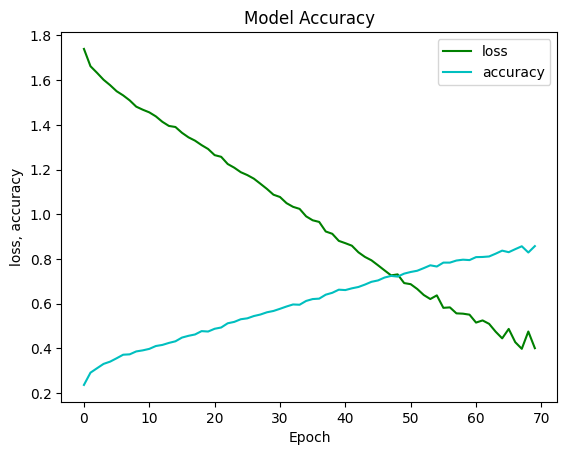

In [ ]:
plt.plot(hist.history['loss'], 'g-', label='loss')
plt.plot(hist.history['accuracy'], 'c-', label='accuracy')

plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('loss, accuracy')
plt.legend()
plt.show()

174/174 [==============================] - 0s 2ms/step
1083


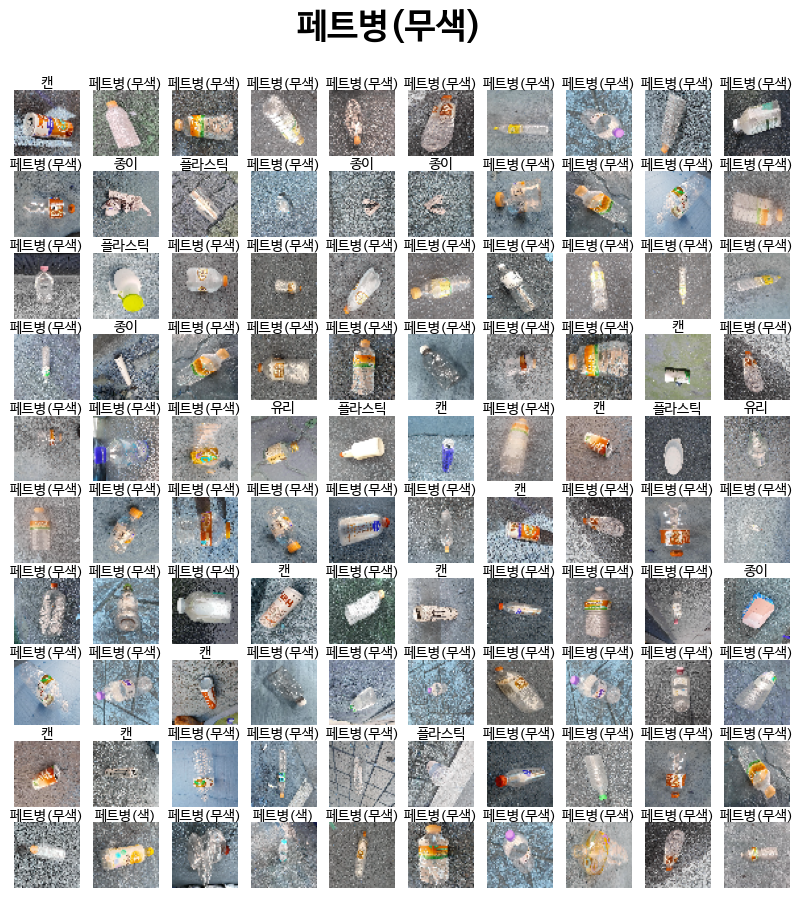

In [ ]:
preds = model.predict(test_input[:])
index = [i for i in range(len(test_target)) if np.argmax(preds[i]) == 1 ]
print(len(index))

test_input2 = test_input.reshape(-1,50,50,3) * 255.0
test_input2 =np.asarray(test_input2, dtype= int)
plt.rc('font', family='NanumBarunGothic')
Class = ['페트병(색)', '페트병(무색)','플라스틱', '캔', '종이', '유리']
plt.figure(figsize=(10, 10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)
for i in range(100):
  ax = plt.subplot(10, 10, i + 1)
  plt.subplots_adjust(wspace=0.2)
  plt.imshow(test_input2[index[i]], cmap = 'gray_r')
  plt.title(Class[test_target[index[i]]],fontsize=10,pad = 1)
  plt.axis("off")
plt.suptitle(Class[test_target[index[i]]],fontweight ="bold",fontsize='25') 
plt.show()

In [ ]:
!wget "https://github.com/ausungju/human_learning/raw/main/test_img.npy" -O test_imgs.npy

--2023-06-05 10:56:02--  https://github.com/ausungju/human_learning/raw/main/test_img.npy
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ausungju/human_learning/main/test_img.npy [following]
--2023-06-05 10:56:03--  https://raw.githubusercontent.com/ausungju/human_learning/main/test_img.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75128 (73K) [application/octet-stream]
Saving to: ‘test_imgs.npy’

test_imgs.npy       100%[===================>]  73.37K  --.-KB/s    in 0.01s   

2023-06-05 10:56:03 (5.84 MB/s) - ‘test_imgs.npy’ saved [75128/75128]



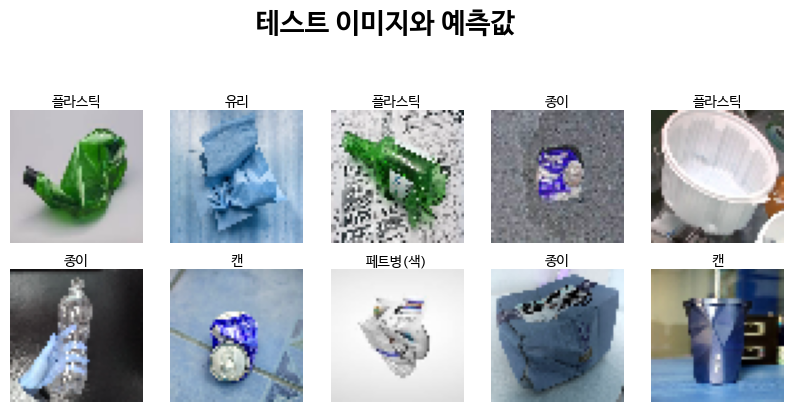

In [ ]:
test_imgs = np.load("test_imgs.npy").reshape(-1,50,50,3)

Class = ['페트병(색)', '페트병(무색)','플라스틱', '캔', '종이', '유리']
plt.figure(figsize=(10, 10))
for i in range( len(test_imgs)):
    temp = test_imgs[i].reshape(1,50,50,3)
    b = model.predict(temp, verbose	= 0)
    c = np.argmax(b)

    ax = plt.subplot(5, 5, i + 1)
    plt.subplots_adjust(wspace=0.2)
    plt.axis("off")

    plt.imshow(temp[0], cmap = 'gray_r')
    plt.title(Class[c],fontsize=10,pad = 1)

plt.suptitle("테스트 이미지와 예측값",fontweight ="bold",fontsize='20') 
plt.show()